Performing VMD analysis...


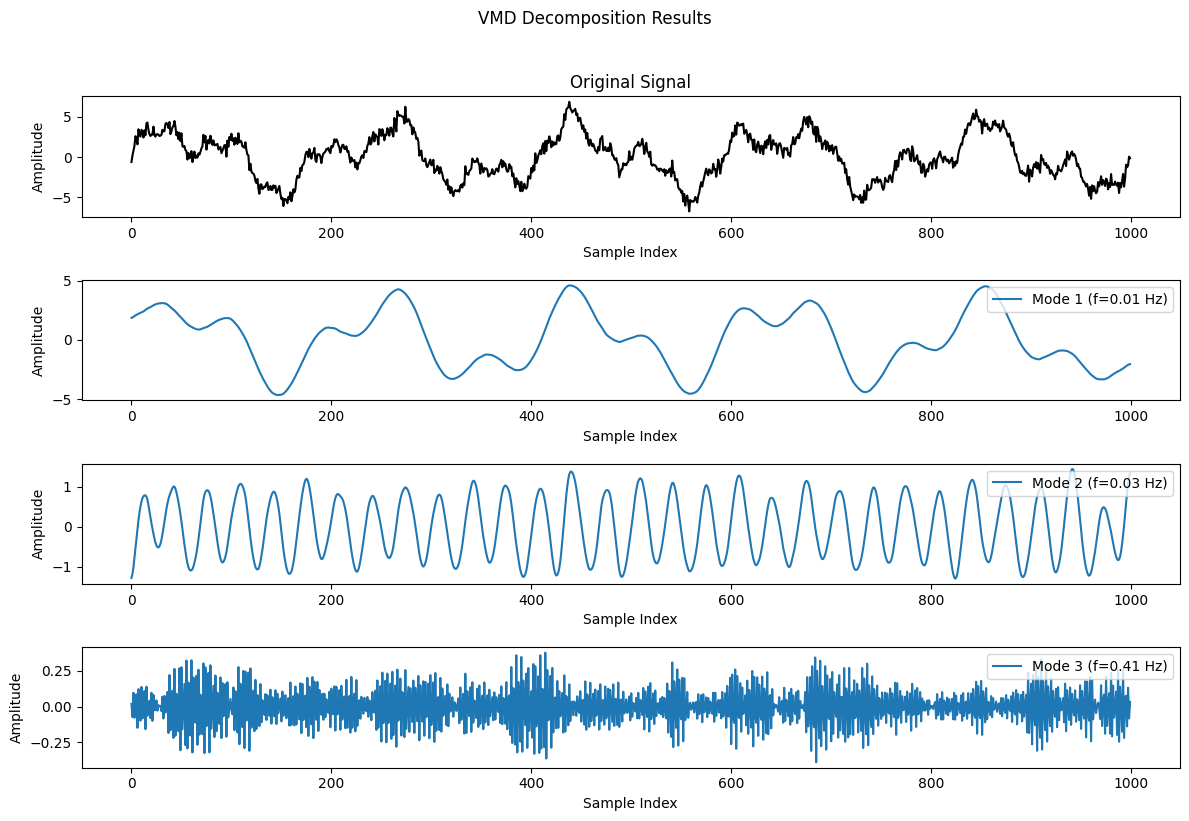


Central frequencies of decomposed modes:
Mode 1: 0.01 Hz
Mode 2: 0.03 Hz
Mode 3: 0.41 Hz


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

def vmd_analysis(signal, K=5, alpha=1000, tau=0, DC=0, init=1, tol=1e-8, plot_results=True):
    """
    Variational Mode Decomposition (VMD) analysis function
    
    Parameters:
    signal: Input signal to decompose
    K: Number of modes to decompose into
    alpha: Bandwidth constraint
    tau: Noise tolerance (0 for strict)
    DC: Whether to include DC component (1) or not (0)
    init: Initialization method for frequencies (1=uniform, 2=random)
    tol: Convergence tolerance
    plot_results: Whether to plot decomposition results
    
    Returns:
    Dictionary containing decomposed modes, their spectra, and central frequencies
    """
    # Perform VMD decomposition
    u, u_hat, omega = VMD(signal, alpha, tau, K, DC, init, tol)
    
    # 确保omega是一维数组并提取最终的中心频率
    # Ensure omega is 1D array and extract final central frequencies
    if omega.ndim > 1:
        omega = omega[-1, :]  # 取最后一次迭代的频率值
    
    # Plot results if requested
    if plot_results:
        plt.figure(figsize=(12, 8))
        
        # Plot original signal
        plt.subplot(K+1, 1, 1)
        plt.plot(signal, 'k')
        plt.title('Original Signal')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        
        # Plot each decomposed mode
        for i in range(K):
            plt.subplot(K+1, 1, i+2)
            # 确保频率是标量
            freq = float(omega[i]) if isinstance(omega[i], np.ndarray) else omega[i]
            plt.plot(u[i, :], label=f'Mode {i+1} (f={freq:.2f} Hz)')
            plt.xlabel('Sample Index')
            plt.ylabel('Amplitude')
            plt.legend(loc='upper right')
        
        plt.suptitle('VMD Decomposition Results', y=1.02)
        plt.tight_layout()
        plt.show()
    
    return {
        'modes': u,           # Decomposed modes (K x N array)
        'spectra': u_hat,     # Spectra of the modes
        'frequencies': omega  # Central frequencies of each mode
    }

# Example usage
if __name__ == "__main__":
    # Generate a test signal or load your own
    N = 1000
    t = np.linspace(0, 1, N, endpoint=False)
    
    # Create a composite signal with multiple frequency components
    signal = 3*np.sin(2*np.pi*5*t) + 2*np.sin(2*np.pi*12*t) + 1*np.sin(2*np.pi*30*t)
    # Add some noise
    signal += 0.5*np.random.randn(N)
    
    # Perform VMD analysis
    print("Performing VMD analysis...")
    vmd_results = vmd_analysis(
        signal,
        K=3,           # Number of modes (matches our composite signal)
        alpha=2000,    # Bandwidth constraint (larger = narrower bands)
        tau=0,         # No noise tolerance
        DC=0,          # No DC component
        plot_results=True
    )
    
    # Print central frequencies
    print("\nCentral frequencies of decomposed modes:")
    for i, freq in enumerate(vmd_results['frequencies']):
        # 确保输出时频率是标量
        freq_val = float(freq) if isinstance(freq, np.ndarray) else freq
        print(f"Mode {i+1}: {freq_val:.2f} Hz")